In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Churn_Data.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
for col in data.columns:
    print(col)

customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [6]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

In [7]:
for element in data.columns[1:]:
    print(data[element].value_counts())
    print('\n')

Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: 

In [8]:
# preprocessing the TotalCharges, changing the null values with zero

data.loc[data['TotalCharges'] == ' ', 'TotalCharges'] = 0
data["TotalCharges"] = data["TotalCharges"].astype("float64") 

In [9]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

<AxesSubplot:>

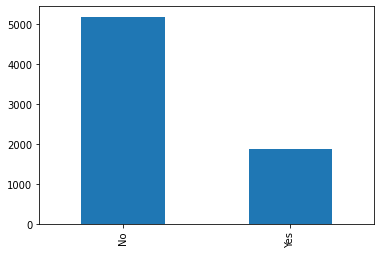

In [10]:
data['Churn'].value_counts().plot(kind = 'bar')

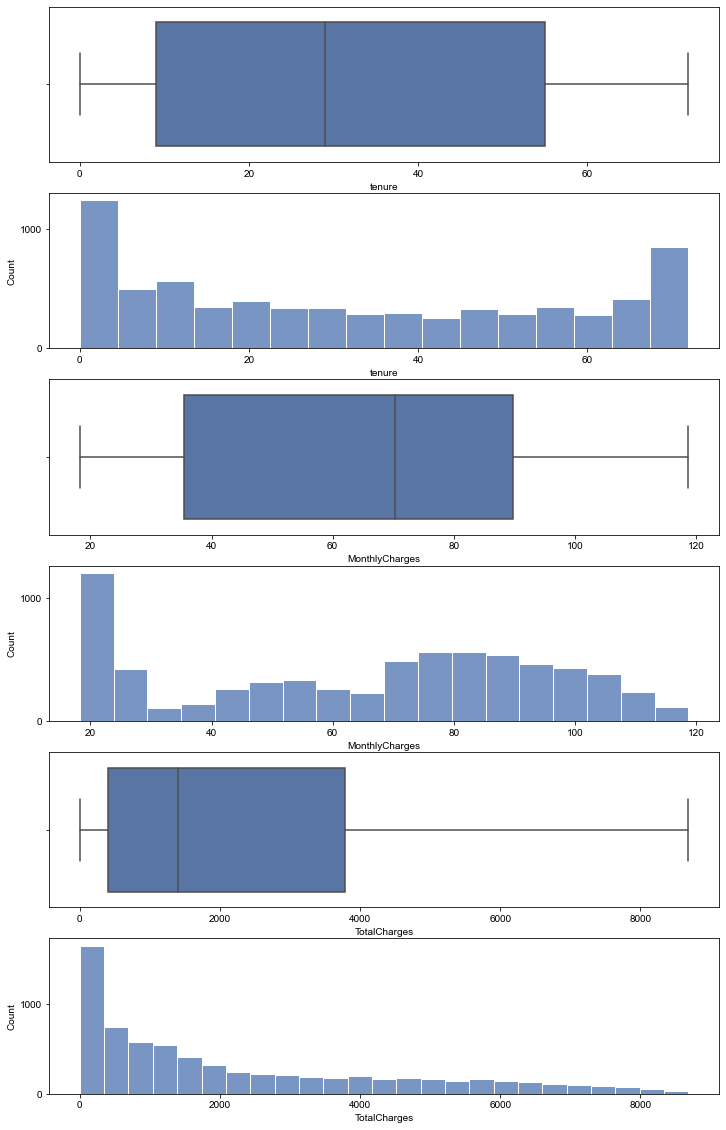

In [11]:
fig , ax = plt.subplots(6 , figsize=(12,20))
sns.set(font_scale = 3)

g=sns.boxplot(data=data, x="tenure", ax=ax[0])
g=sns.histplot(data=data, x="tenure", ax=ax[1])


g=sns.boxplot(data=data, x="MonthlyCharges", ax=ax[2])
g=sns.histplot(data=data, x="MonthlyCharges", ax=ax[3])


g=sns.boxplot(data=data, x="TotalCharges", ax=ax[4])
g=sns.histplot(data=data, x="TotalCharges", ax=ax[5])

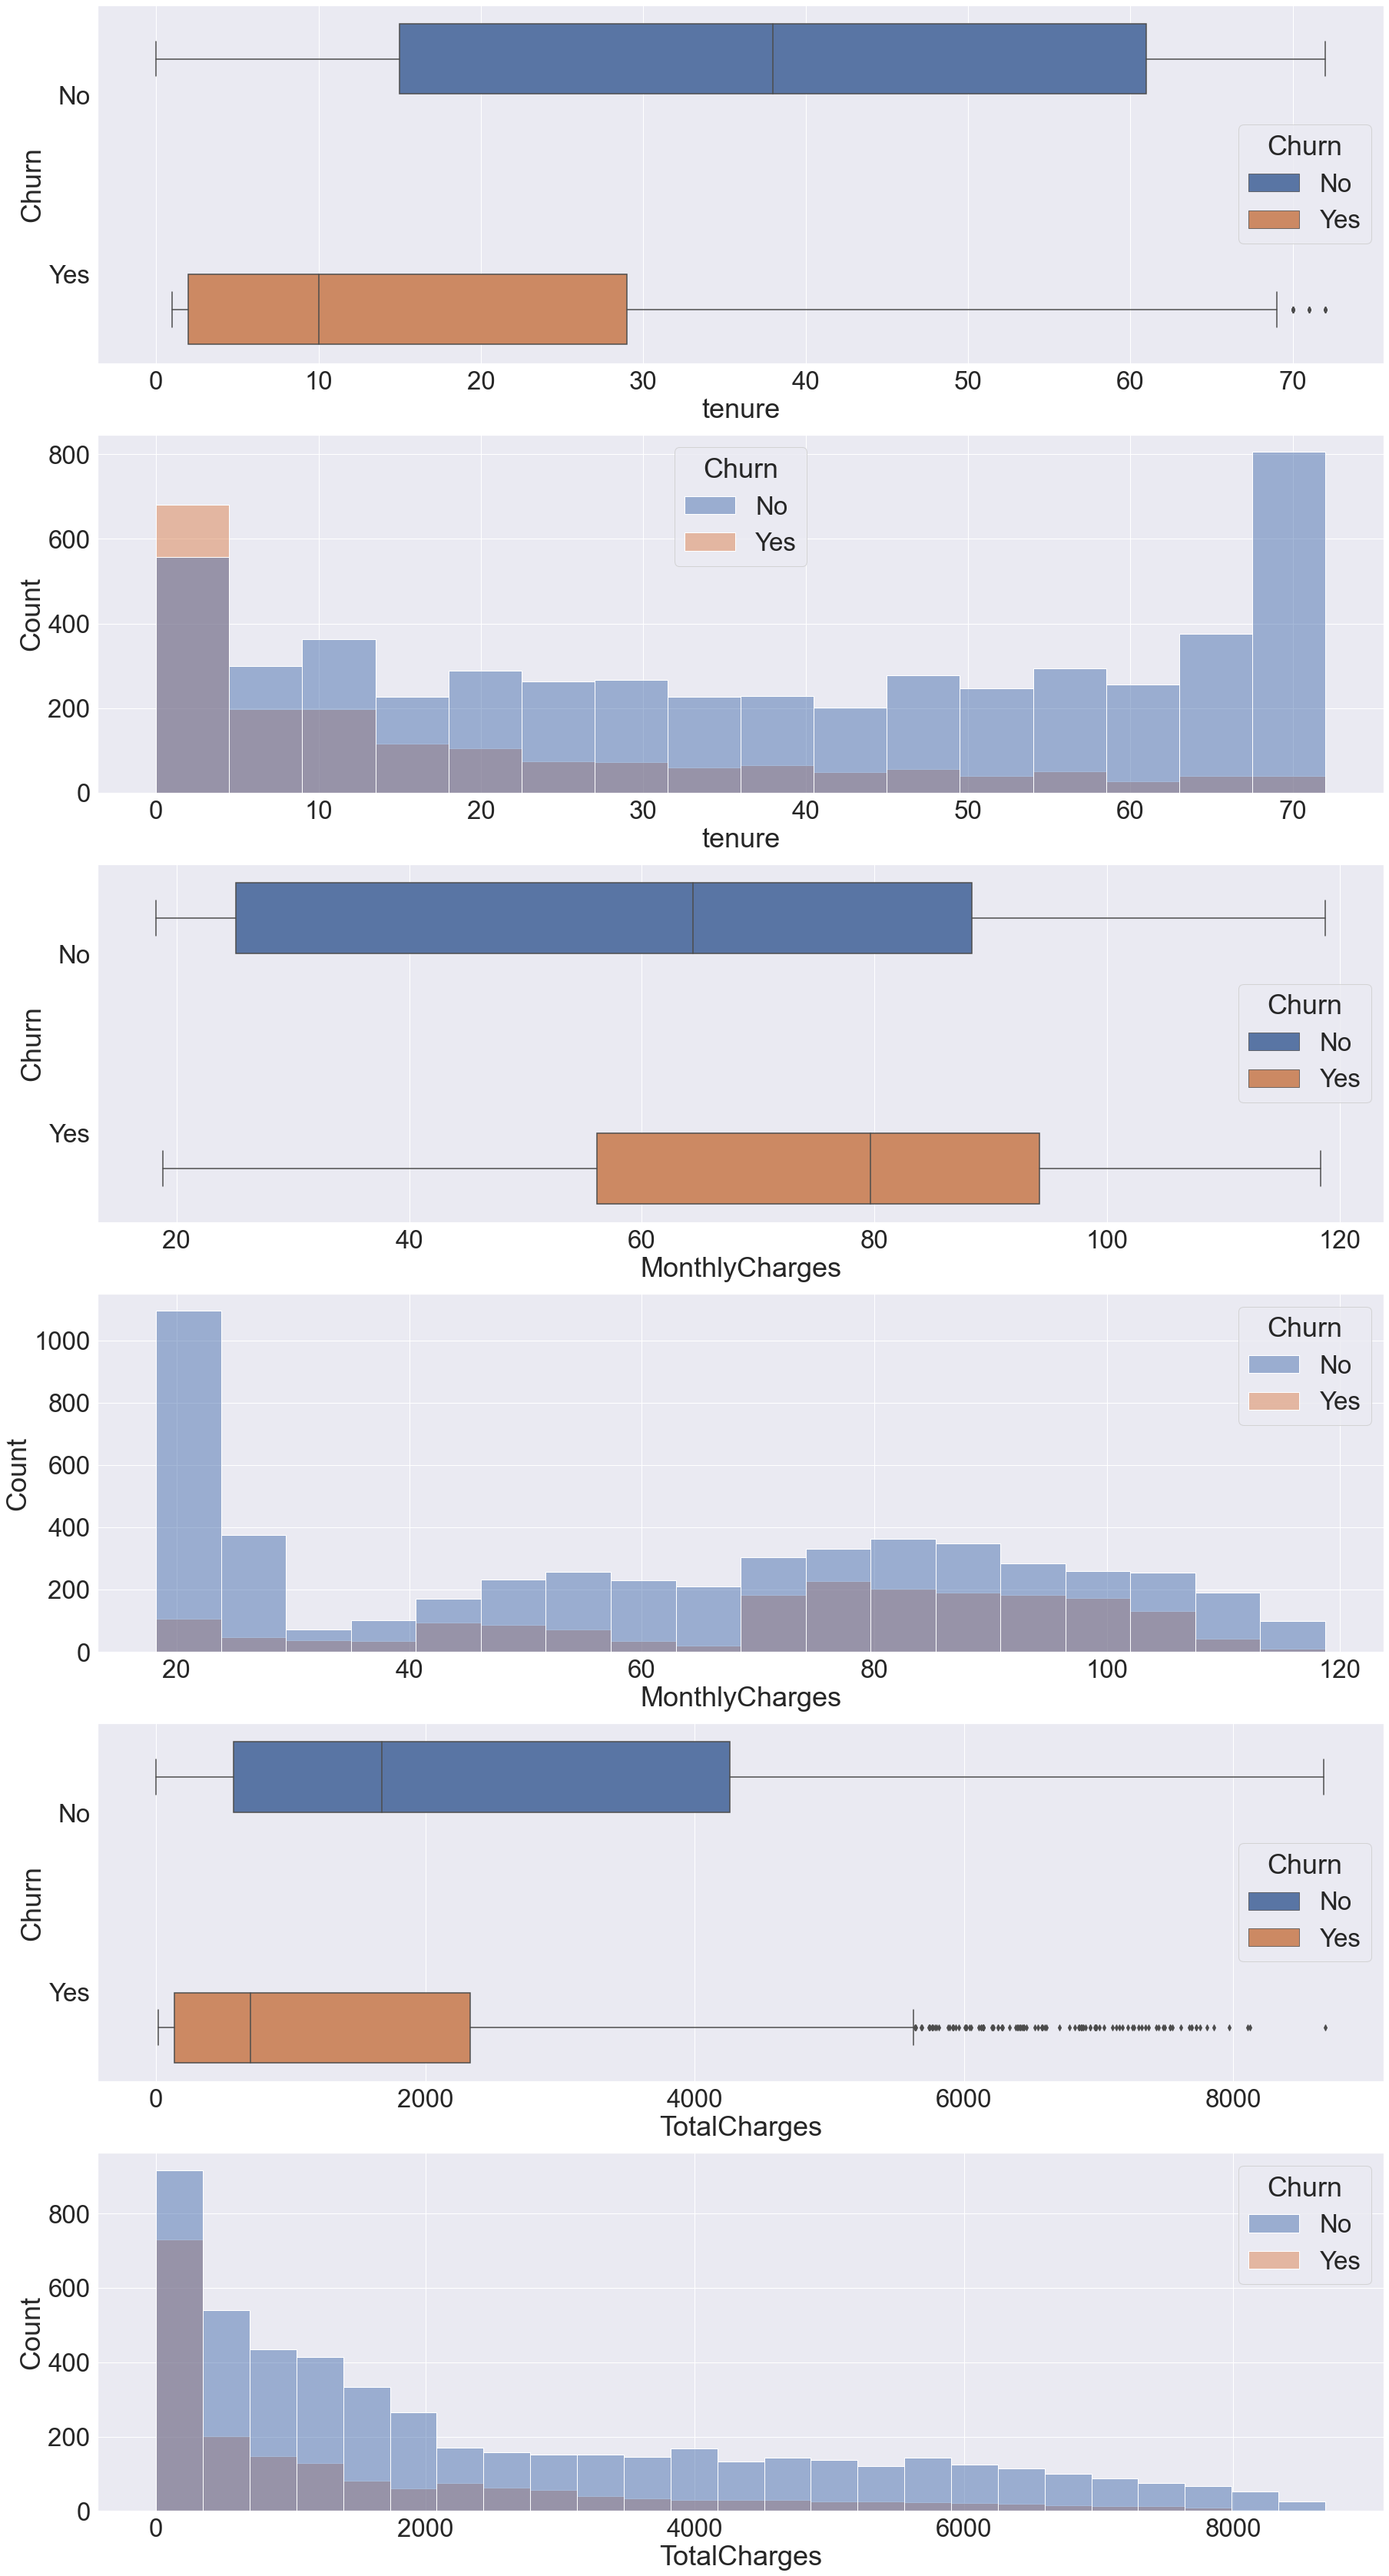

In [12]:
fig , ax = plt.subplots(6 , figsize=(30,60))
sns.set(font_scale = 3)

g=sns.boxplot(data=data, x="tenure", y='Churn' , ax=ax[0] , hue = 'Churn')
g=sns.histplot(data=data, x="tenure", ax=ax[1] , hue = 'Churn')


g=sns.boxplot(data=data, x="MonthlyCharges", y='Churn' , ax=ax[2] , hue = 'Churn')
g=sns.histplot(data=data, x="MonthlyCharges", ax=ax[3] , hue = 'Churn')


g=sns.boxplot(data=data, x="TotalCharges", y='Churn' , ax=ax[4] , hue = 'Churn')
g=sns.histplot(data=data, x="TotalCharges", ax=ax[5] , hue = 'Churn')

In [13]:
categorical_variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [14]:
data_dummies = pd.get_dummies(data[categorical_variables])

data_dummies[['tenure' , 'MonthlyCharges' , 'TotalCharges']] = data[['tenure' , 'MonthlyCharges' , 'TotalCharges']]

data_dummies['Churn'] = data['Churn']
data_dummies['Churn'] = data_dummies['Churn'].map({'No':0 , 'Yes':1})

c:\users\anany\appdata\local\programs\python\python39\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [15]:
data_dummies.head()

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0,1,1,0,1,0,...,0,1,0,0,1,0,1,29.85,29.85,0
1,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,0,1,34,56.95,1889.50,0
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,2,53.85,108.15,1
3,0,1,1,0,1,0,1,0,1,0,...,1,0,1,0,0,0,45,42.30,1840.75,0
4,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,2,70.70,151.65,1


<AxesSubplot:>

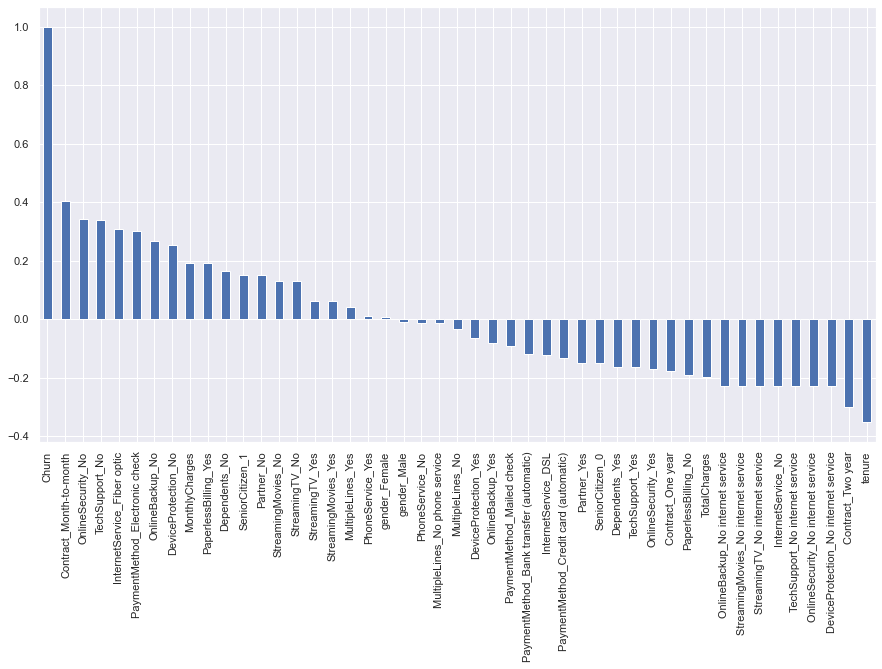

In [16]:
sns.set(font_scale = 1)
plt.figure(figsize = (15 , 8))
data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

<AxesSubplot:>

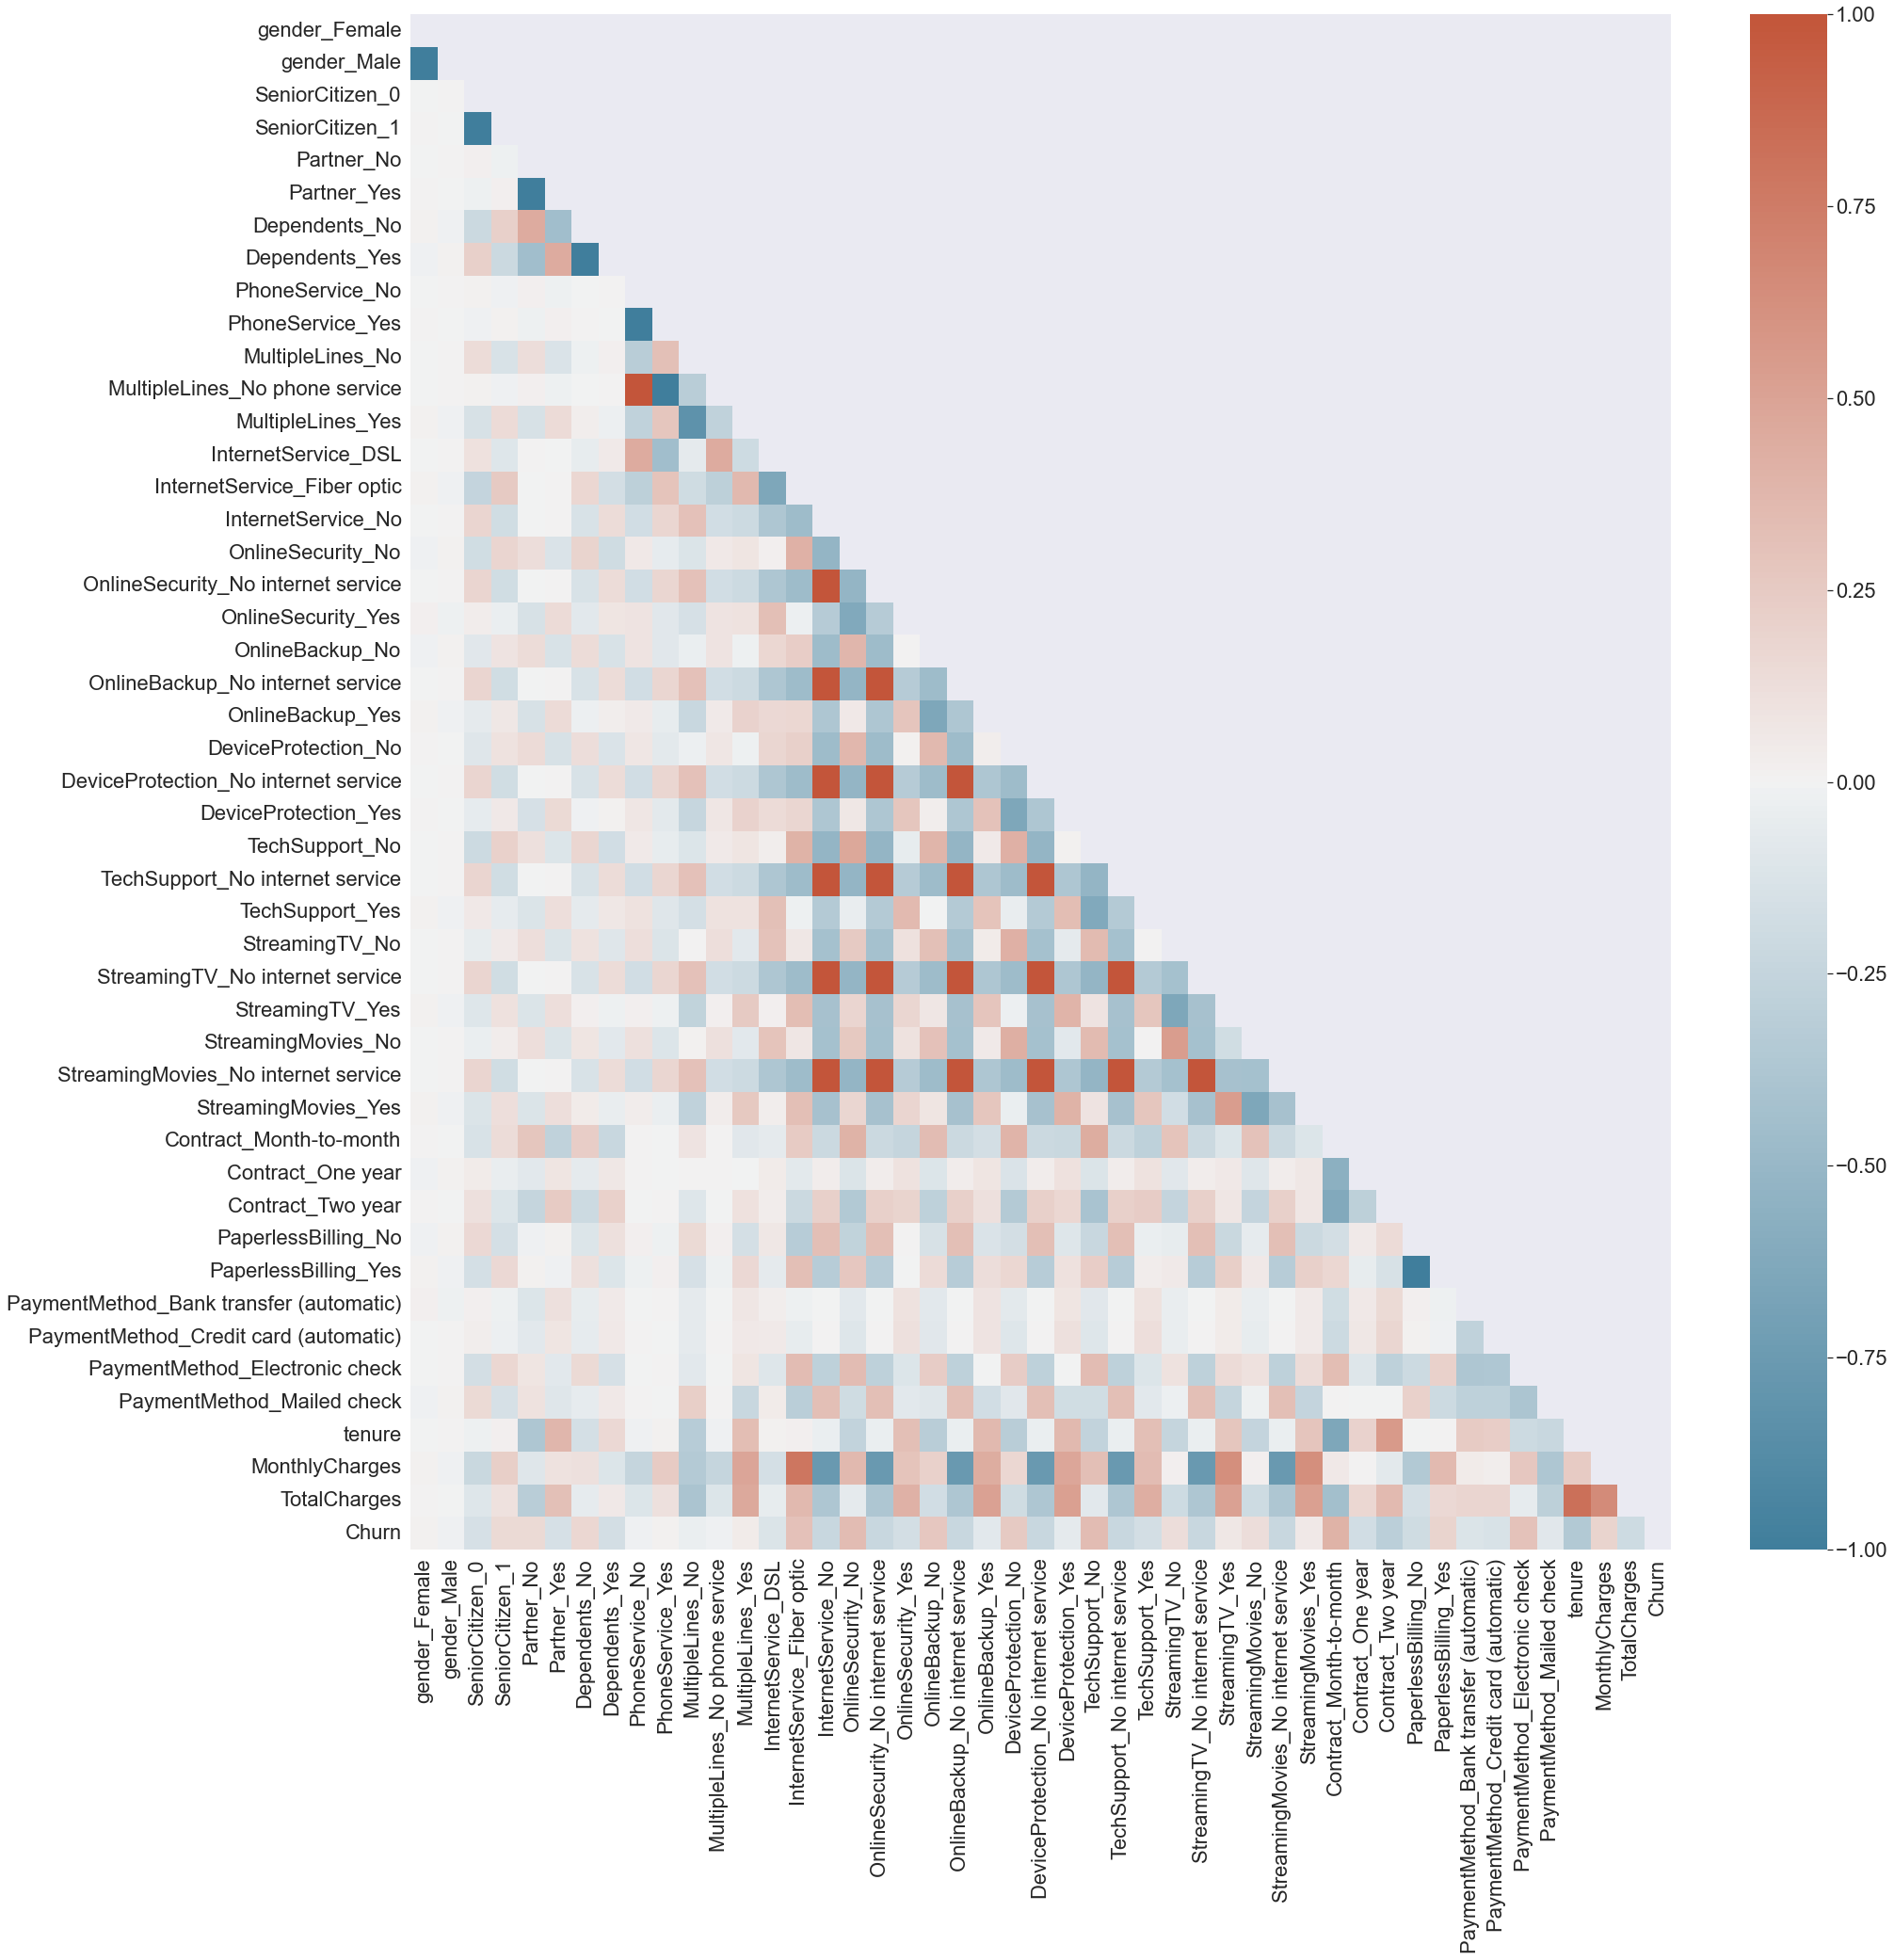

In [17]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(30,30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(data_dummies.corr(), dtype=bool))
sns.heatmap(data_dummies.corr(), mask=mask, cmap=cmap)

In [18]:
train_columns = data.columns.to_list()

for elem in ['customerID' , 'Churn']:
    train_columns.remove(elem)

In [19]:
X = data[train_columns]
y = data_dummies['Churn']

In [20]:
from sklearn.preprocessing import LabelEncoder

for col in train_columns:
    le = LabelEncoder() #le-->Label Encoder
    le.fit(X.loc[:,col])
    X[col] = le.transform(X[col])

    
clf_stats_df = pd.DataFrame(columns = ['clf-name' , 'f1-score' , 'accuracy' , 'elapsed-time'])

C:\Users\anany\AppData\Local\Temp\ipykernel_18080\1954245914.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.transform(X[col])


In [21]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(X ,
                                                       y ,
                                                       test_size = 0.2)

In [22]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((5634, 19), (5634,), (1409, 19), (1409,))

In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt",
                                  max_leaf_nodes = 50)

model.fit(X_train , y_train)

RandomForestClassifier(max_leaf_nodes=50, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [24]:
preds = model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [26]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1008
           1       0.73      0.42      0.53       401

    accuracy                           0.79      1409
   macro avg       0.77      0.68      0.70      1409
weighted avg       0.78      0.79      0.77      1409



In [27]:
print(confusion_matrix(y_test , preds))

[[946  62]
 [234 167]]


In [28]:
print(accuracy_score(y_test , preds))

0.7899219304471257


In [29]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter = 1000)
model2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [30]:
y_pred_2 = model.predict(X_test)

In [31]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1008
           1       0.73      0.42      0.53       401

    accuracy                           0.79      1409
   macro avg       0.77      0.68      0.70      1409
weighted avg       0.78      0.79      0.77      1409



In [32]:
print(confusion_matrix(y_test , y_pred_2))

[[946  62]
 [234 167]]


In [33]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model_3 = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model_3.fit(X_train,y_train)

AdaBoostClassifier()

In [34]:
y_pred_3 = model_3.predict(X_test)

In [35]:
print(accuracy_score(y_test , y_pred_3))

0.8126330731014905


In [36]:
print(confusion_matrix(y_test , y_pred_3))

[[931  77]
 [187 214]]


In [37]:
import tensorflow as tf
from tensorflow.keras import layers

model_4 = tf.keras.Sequential([
    layers.Dense(128 , activation = 'relu'),
    layers.Dense(64 , activation = 'relu'),
    layers.Dense(32 , activation = 'relu'),
    layers.Dense(1 , activation = 'sigmoid')
])

model_4.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [38]:
model_4.fit(X_train,
           y_train,
           epochs = 60,
           verbose = 0)

In [39]:
model_4.evaluate(X_train , y_train)

177/177 [==============================] - 1s 3ms/step - loss: 0.6188 - accuracy: 0.5864


[0.6187524199485779, 0.5864394903182983]

In [40]:
y_pred_4 = tf.round(model_4.predict(X_test))

45/45 [==============================] - 0s 2ms/step


In [41]:
print(accuracy_score(y_test , y_pred_4))

0.6139105748757985
